# Image Recognition : Digit Classification with KNN and Naive Bayes

In this project, I'll implement your own image recognition system for classifying digits. The number of packages we can use for this school project are restricted to those given below.


In [24]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data and partition into training, development, and test sets. A small subset of the training data called mini_train_data and mini_train_labels was defined for use in all the experiments below, unless otherwise noted.

In [25]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1: Explore the data

Show a 10x10 grid that visualizes 10 examples of each digit.



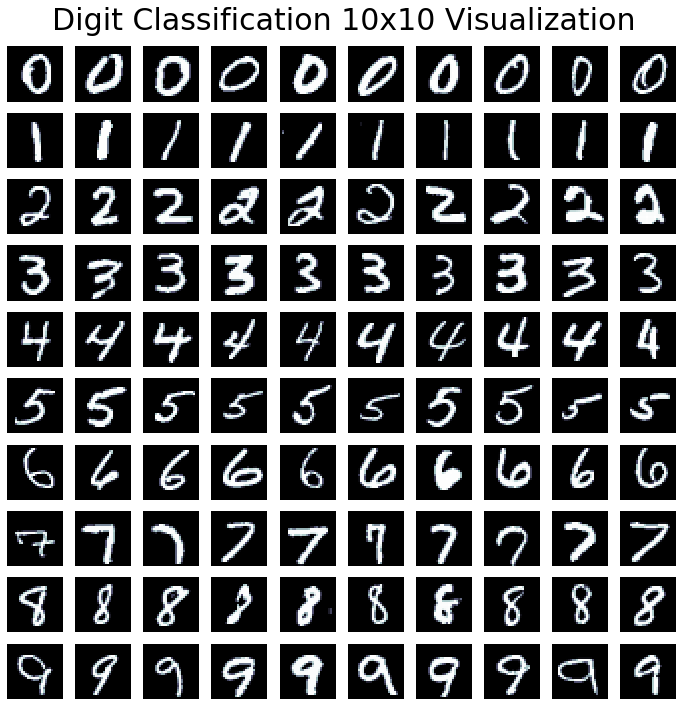

In [26]:
#Part 1 Answer

def P1(num_examples=10):
    
    #Find unique digits in Y values
    digits = np.unique(Y)
    
    #Find dimensions for array
    dim = int(np.sqrt(X.shape[1]))
    
    #Plot 10 by 10 subplots
    fig, axs = plt.subplots(len(digits), num_examples,figsize=(12,12))
    for i,d in enumerate(digits):
        plt.title("Digit Classification 10x10 Visualization", y=12, x=-5,fontsize=30)
        for j in range(num_examples):
            axs[i,j].imshow(X[Y==d][j].reshape((dim,dim)),cmap=plt.cm.bone)
            axs[i,j].axis('off')
            
#Run the code for 10 examples per digit
P1(10)



### Part 2: Apply a KNN Model and Evaluate Model Performance

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show the performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.


In [27]:
#Part 2 Answer


from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
k_values =[1, 3, 5, 7, 9]


def P2(k_values):
    for i in k_values:
        #Use KNeighborsClassifier to produce model
        knn = KNeighborsClassifier(n_neighbors=i, p=2, metric ='minkowski')
        knn.fit(mini_train_data,mini_train_labels)
        y_pred_knn = knn.predict(dev_data)
        
        #Use classification report to get detailed results
        print("Performance metrics for K = " + str(i))
        knn_score = knn.score(dev_data, dev_labels)
        print('KNN :', knn_score)
        error = (dev_labels != y_pred_knn).sum()/len(y_pred_knn)
        print('Prediction error: %.3f' % error)
        print('Prediction accuracy: %.3f'% (1-error))
        print(classification_report(dev_labels, y_pred_knn))
        print('\n')
        print('\n')
#Run code for various k values
P2(k_values)



Performance metrics for K = 1
KNN : 0.884
Prediction error: 0.116
Prediction accuracy: 0.884
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000





Performance metrics for K = 3
KNN : 0.876
Prediction error: 0.124
Prediction accuracy: 0.876
              precision    recall  f1-score   suppo

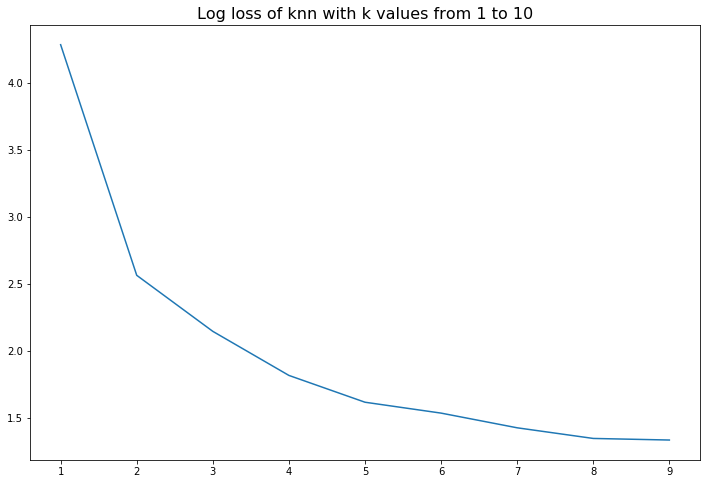

In [28]:
#Not required as part of the question but just testing best n neighbours using Grid Search

import pandas as pd
from sklearn.model_selection import GridSearchCV
knn = GridSearchCV(
     estimator = KNeighborsClassifier(),
     param_grid = {'n_neighbors': np.arange(1,10)},
     scoring='neg_log_loss',
     cv = 5
)

knn.fit(mini_train_data,mini_train_labels)
scores = pd.Series(abs(knn.cv_results_['mean_test_score']))
scores.index = np.arange(1,10)
scores.plot(figsize=(12,8))
plt.title("Log loss of knn with k values from 1 to 10", fontsize=16)
plt.show()



#### Question : Evaluate and show the performance of each model.   
#### Answer : 
K=1 has the highest prediction accuracy of 0.884 versus all other kmodels. K=1 has similar performance on to k=5 on other metrics like precision, recall. K=1 may result in overfitting. In conclusion k=1 has the best performance.

#### Question : For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label.   
#### Answer : 
See K=1 Classification report above. Precision weighted average is 0.89, Recall is 0.88, F1 is 0.88.


#### Question : Which is the most difficult digit?   
#### Answer : 
The number 8 is the most difficult digit to classify.


### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.


In [29]:
#Part 3 Answer

import time

#List train sizes and initiate blank accuracies list

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []

### STUDENT START ###
def P3(train_sizes, accuracies):
    #Use KNeighborsClassifier to produce model
    for j,i in enumerate(train_sizes):
        train_data1, train_labels1 = X[:i], Y[:i]
        knn = KNeighborsClassifier(n_neighbors=1, p=2, metric ='minkowski')
        knn.fit(train_data1,train_labels1)
        y_pred_knn = knn.predict(dev_data)
        #Show time needed to measure performance of the model
        start_time = time.time()
        #Use classification report to get results
        print("\n \n Performance metrics for Train Size = " + f"{i:,}")
        knn_score = knn.score(dev_data, dev_labels)
        print('KNN :', knn_score)
        error = (dev_labels != y_pred_knn).sum()/len(y_pred_knn)
        print('Prediction error: %.3f' % error)
        print('Prediction accuracy: %.3f'% (1-error))
        print(classification_report(dev_labels, y_pred_knn))
        lapsed_time = time.time() - start_time
        print("Lapsed time for Performance Measurement on Train size = " + f"{i:,}" + " is " + str(round(lapsed_time,2))+" seconds ." )
        accuracies.append(knn_score)
    return accuracies    
        ### STUDENT END ###


P3(train_sizes, accuracies)
print("Accuracies list :" +str(accuracies))


 
 Performance metrics for Train Size = 100
KNN : 0.702
Prediction error: 0.298
Prediction accuracy: 0.702
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       106
           1       0.70      0.99      0.82       118
           2       0.77      0.51      0.61       106
           3       0.72      0.68      0.70        97
           4       0.49      0.78      0.61        92
           5       0.81      0.72      0.76        88
           6       0.87      0.65      0.74       102
           7       0.69      0.89      0.78       102
           8       0.71      0.45      0.55        94
           9       0.67      0.40      0.50        95

    accuracy                           0.70      1000
   macro avg       0.72      0.69      0.69      1000
weighted avg       0.72      0.70      0.69      1000

Lapsed time for Performance Measurement on Train size = 100 is 0.18 seconds .

 
 Performance metrics for Train Size = 200
KNN : 0.79

### Part 4: Regression Plots and Transformations

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.



𝑅2 of Linear regression model with no transformation: 0.4177006634161019


Predicted values for 60000, 120000, and 1000000 using Linear Regression :
[[1.23617317]
 [1.63742805]
 [7.52249967]]




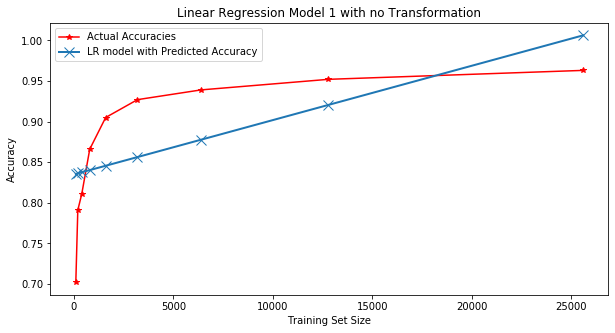

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     5.021
Date:                Sat, 03 Jul 2021   Prob (F-statistic):             0.0600
Time:                        13:50:49   Log-Likelihood:                 12.028
No. Observations:                   9   AIC:                            -20.06
Df Residuals:                       7   BIC:                            -19.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8349      0.029     28.392      0.0

C:\Users\Zhuang\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [30]:
### Part 4 
## I have created 5 scenario transformations.

#Part 4 answer (i)

# Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model for 60000, 120000, and 1000000 
#given training set sizes from part 3

test_x_sizes = np.array([60000, 120000, 1000000]).reshape(-1,1)
train_x_sizes = np.array(train_sizes)[:, np.newaxis]
train_y_accuracies = np.array(accuracies)[:, np.newaxis]
lm1 = LinearRegression(fit_intercept = True)
lm1.fit(train_x_sizes, train_y_accuracies)
lm1_ypred = lm1.predict(test_x_sizes)


#Part 4 answer (ii) 
#Show 𝑅2 of the regression model
training_score1=lm1.score(train_x_sizes, train_y_accuracies)
print("𝑅2 of Linear regression model with no transformation: " + str(training_score1))
print('\n')

#Part 4 answer (iii)
#Show the accuracies it predicts for training set sizes 60000, 120000, and 1000000. 
print('Predicted values for 60000, 120000, and 1000000 using Linear Regression :')
print(lm1_ypred)
print('\n')

#Part 4 answer (iv)
#Show a lineplot of the actual accuracies and predicted accuracies vs. training set size. 
lm1_ypred_train = lm1.predict(train_x_sizes)

# Initialize a new plot and set plot size
plt.figure(figsize=(10, 5)) 
# plot the true function
plt.plot(train_x_sizes, train_y_accuracies , label="Actual Accuracies", marker="*", color='red');
# Show the fitted function for the linear model
plt.plot(train_x_sizes, lm1_ypred_train , label="LR model with Predicted Accuracy", linewidth = '2', marker="x", markersize="10" )
# Add labels, title, legend to the plot
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
#plt.xlim((-.05, 1.05))
#plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Linear Regression Model 1 with no Transformation")
plt.show()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
X2 = sm.add_constant(train_x_sizes)
est = sm.OLS(train_y_accuracies, X2)
est2 = est.fit()
print(est2.summary())

Predicted values for 60000, 120000, and 1000000 using Regression on Odds and then converting to Probability :
[[0.98329271]
 [0.99111439]
 [0.99887043]]


𝑅2 of Linear regression model transformation to odds: 0.8649045423180002
The R-Squared of Model 2 -Transformation to odds at 0.86 is much higher than that in Model 1 and so explains more variability




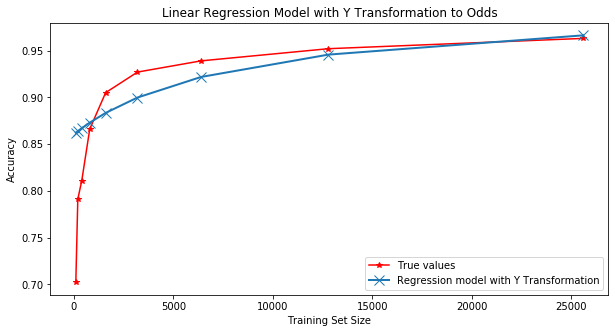

In [31]:
#Part 4 answer (v)
# Try transformation of y variable to odds and check effect on R2 for the regression model 2

prob_to_odds = lambda y : y / (1.0 - y)
odds_train = prob_to_odds(train_y_accuracies)


# Produce a regression model using y odds  values

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(train_x_sizes, odds_train)
lm2_ypred = lm2.predict(test_x_sizes)

#Check predicted values after converting from odds to probability. Conclude that numbers do not go out of range.
odds_to_prob = lambda y: y / (1.0 + y)
print('Predicted values for 60000, 120000, and 1000000 using Regression on Odds and then converting to Probability :')
print(odds_to_prob(lm2_ypred))
print('\n')

 
#Show 𝑅2 of the regression model on odds
training_score2=lm2.score(train_x_sizes, odds_train)
print("𝑅2 of Linear regression model transformation to odds: " + str(training_score2))
print("The R-Squared of Model 2 -Transformation to odds at 0.86 is much higher than that in Model 1 and so explains more variability")
print('\n')

#Show a lineplot of the actual accuracies and predicted accuracies vs. training set size. 
lm2_ypred_train = lm2.predict(train_x_sizes)
#print('Predicted values for 100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600 using Regression on Odds :')
#print(lm2_ypred_train)
# Initialize a new plot and set plot size
plt.figure(figsize=(10, 5)) 
# plot the true function
plt.plot(train_x_sizes, odds_to_prob(odds_train), label="True values", marker="*", color='red');
# Show the fitted function for the Transformed Regression model on odds, y values are plotted after converting back to probability
plt.plot(train_x_sizes, odds_to_prob(lm2_ypred_train) , label="Regression model with Y Transformation", linewidth = '2', marker="x", markersize="10" )
# Add labels, title, legend to the plot
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
#plt.xlim((-.05, 1.05))
#plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Linear Regression Model with Y Transformation to Odds")
plt.show()



Predicted values for 60000, 120000, and 1000000 using Regression on Log-x :
[[1.03358792]
 [1.06432125]
 [1.15833125]]


𝑅2 of regression model transformation on x with log function: 0.9068304252436642
The R-Squared of Model 3 -Transformation on x with log function at 0.906 is higher than that in Model 1 and Model 2, and so explains more data variability




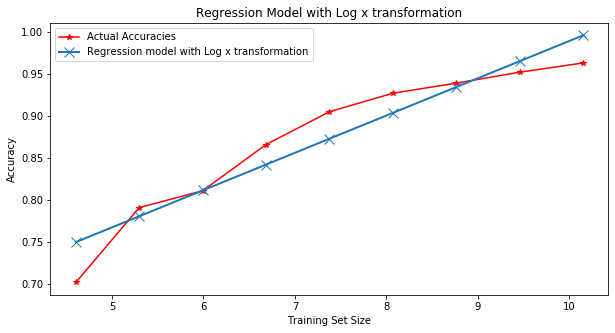

In [32]:

#Part 4 answer (vi)
# Try transformation of x variable using logarithmic function and check effect on R2 for the regression model 3


log_train_x_sizes = np.log(train_x_sizes)
log_test_x_sizes = np.log(test_x_sizes)
# Produce a regression model using log x

lm3 = LinearRegression(fit_intercept = True)
lm3.fit(log_train_x_sizes, train_y_accuracies )
lm3_ypred = lm3.predict(log_test_x_sizes)

#Check predicted values after applying log function on X. 

print('Predicted values for 60000, 120000, and 1000000 using Regression on Log-x :')
print(lm3_ypred)
print('\n')

 
#Show 𝑅2 of the regression model on log function of x
training_score3=lm3.score(log_train_x_sizes, train_y_accuracies)
print("𝑅2 of regression model transformation on x with log function: " + str(training_score3))
print("The R-Squared of Model 3 -Transformation on x with log function at 0.906 is higher than that in Model 1 and Model 2, and so explains more data variability")
print('\n')

#Show a lineplot of the actual accuracies and predicted accuracies vs. training set size. 
lm3_ypred_train = lm3.predict(log_train_x_sizes)
#print('Predicted values for 100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600 using Regression on Odds :')
#print(lm3_ypred_train)
# Initialize a new plot and set plot size
plt.figure(figsize=(10, 5)) 
# plot the true function
plt.plot(log_train_x_sizes, train_y_accuracies , label="Actual Accuracies", marker="*", color='red');
# Show the fitted function for the Transformed Regression model on log-x
plt.plot(log_train_x_sizes, lm3_ypred_train , label="Regression model with Log x transformation", linewidth = '2', marker="x", markersize="10" )
# Add labels, title, legend to the plot
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
#plt.xlim((-.05, 1.05))
#plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Regression Model with Log x transformation")
plt.show()

Predicted values for 60000, 120000, and 1000000 using Regression on Transformed X and Y Variables :
[[0.96307017]
 [0.96659196]
 [0.97413657]]


𝑅2 of Linear regression model transformation on x with log function: 0.9395242859897991
The R-Squared of Model 4 -Transformation on x and y is at 0.94 and is higher than that in Model 1 to 3, and so explains more variability




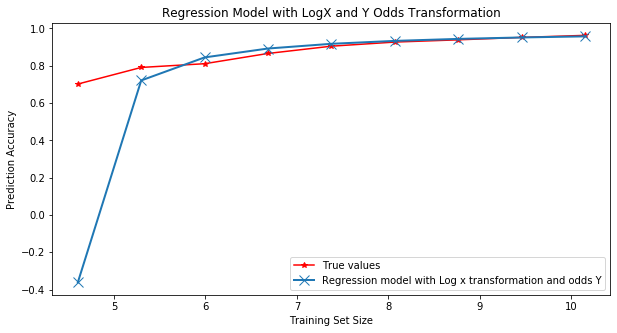

In [33]:
#Part 4 answer (vii)
# Try transformation of x with log function and y variables with odds function and check effect on R2 for the regression model 4

# Produce a regression model applying transformations to log x and y odds
log_train_x_sizes = np.log(train_x_sizes)
log_test_x_sizes = np.log(test_x_sizes)

lm4 = LinearRegression(fit_intercept = True)
lm4.fit(log_train_x_sizes, odds_train )
lm4_ypred = lm4.predict(log_test_x_sizes)

#Check predicted values after applying transformations to x and y

print('Predicted values for 60000, 120000, and 1000000 using Regression on Transformed X and Y Variables :')
print(odds_to_prob(lm4_ypred))
print('\n')


#Show 𝑅2 of the Transformed regression model on X and Y variables
training_score4=lm4.score(log_train_x_sizes, odds_train)
print("𝑅2 of Linear regression model transformation on x with log function: " + str(training_score4))
print("The R-Squared of Model 4 -Transformation on x and y is at 0.94 and is higher than that in Model 1 to 3, and so explains more variability")
print('\n')

#Show a lineplot of the actual accuracies and predicted accuracies vs. training set size. 
lm4_ypred_train = lm4.predict(log_train_x_sizes)

# Initialize a new plot and set plot size
plt.figure(figsize=(10, 5)) 

# plot the true function
plt.plot(log_train_x_sizes, odds_to_prob(odds_train) , label="True values", marker="*", color='red');

# Show the fitted function for the Transformed Regression model on X and Y
plt.plot(log_train_x_sizes, odds_to_prob(lm4_ypred_train) , label="Regression model with Log x transformation and odds Y", linewidth = '2', marker="x", markersize="10" )

# Add labels, title, legend to the plot
plt.xlabel("Training Set Size")
plt.ylabel("Prediction Accuracy")
plt.legend(loc="best")
plt.title("Regression Model with LogX and Y Odds Transformation")
plt.show()



Predicted values for 60000, 120000, and 1000000 using Regression on Transformed X and Y Variables :
[[0.99999789]
 [0.99999903]
 [0.99999987]]


𝑅2 of Linear regression model transformation on x with log function: 0.9897378265316935
The R-Squared of Model 5 -Transformation on x and y at 0.99 is higher than that in Model 1 to 4 , and so explains more variability




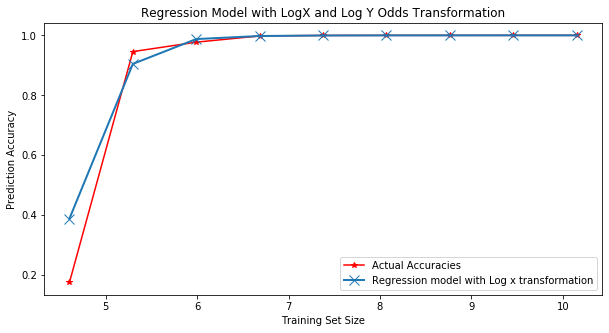

In [34]:
#Part 4 answer (viii)
# Finally, Try transformation to log x and log y odds variable and check effect on R2 for the regression model 5
tenpower = lambda y : y**10
log_odds_train = np.log(odds_train)

# Produce a regression model applying transformations to log x and log y odds

lm5 = LinearRegression(fit_intercept = True)
lm5.fit(log_train_x_sizes, log_odds_train )
lm5_ypred = lm5.predict(log_test_x_sizes)


#Check predicted values after applying transformations to x and y

print('Predicted values for 60000, 120000, and 1000000 using Regression on Transformed X and Y Variables :')
print(odds_to_prob(tenpower(lm5_ypred)))
print('\n')

 
#Show 𝑅2 of the Transformed regression model on X and Y variables
training_score5=lm5.score(log_train_x_sizes, log_odds_train)
print("𝑅2 of Linear regression model transformation on x with log function: " + str(training_score5))
print("The R-Squared of Model 5 -Transformation on x and y at 0.99 is higher than that in Model 1 to 4 , and so explains more variability")
print('\n')

#Show a lineplot of the actual accuracies and predicted accuracies vs. training set size. 
lm5_ypred_train = lm5.predict(log_train_x_sizes)

# Initialize a new plot and set plot size
plt.figure(figsize=(10, 5)) 
# plot the true function
plt.plot(log_train_x_sizes, odds_to_prob(tenpower(log_odds_train)) , label="Actual Accuracies", marker="*", color='red');
# Show the fitted function for the Transformed Regression model on X and Y
plt.plot(log_train_x_sizes, odds_to_prob(tenpower(lm5_ypred_train)), label="Regression model with Log x transformation", linewidth = '2', marker="x", markersize="10" )
# Add labels, title, legend to the plot
plt.xlabel("Training Set Size")
plt.ylabel("Prediction Accuracy")

plt.legend(loc="best")
plt.title("Regression Model with LogX and Log Y Odds Transformation")
plt.show()



In [16]:
train_data_60k, train_labels_60k = X[:60000], Y[:60000]
knn_60k = KNeighborsClassifier(n_neighbors=1, p=2, metric ='minkowski')
knn_60k.fit(train_data_60k,train_labels_60k)
y_pred_knn_60k = knn_60k.predict(dev_data)
knn_score_60k = knn_60k.score(dev_data, dev_labels)
print('KNN :', knn_score_60k)

KNN : 0.971


In [17]:
train_data_70k, train_labels_70k = X[:70000], Y[:70000]
knn_70k = KNeighborsClassifier(n_neighbors=1, p=2, metric ='minkowski')
knn_70k.fit(train_data_70k,train_labels_70k)
y_pred_knn_70k = knn_70k.predict(dev_data)
knn_score_70k = knn_70k.score(dev_data, dev_labels)
print('KNN :', knn_score_70k)

KNN : 1.0


#### ANSWER Part 4:

Accuracy predicted for Training size of 60,000, 120,000 and 1,000,000 using Linear Regression with no Transformation is outside the acceptable range of [0,1]  which is an illogical and inaccurate result. 

The linear regression model's training set $𝑅^2$ is 41.77% which means the regression model without transformation does not fit the data or explain the data very well.

The problem with using linear regression without any transformation is that it predicts and additive linear relationship between the variables X and Y :   

(1) The straight line does not describe the relationship between the training data set size and accuracy    

(2) The predicted accuracy value is outside of the acceptable range of 0 to 1   

(3) The X data is sparsely distributed without any transformations and this results in inaccurate predictions   

(4) The residuals do not have constant variance are not normally distributed 




### Part 5: Confusion Matrix

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.


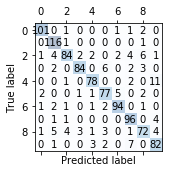

In [35]:
#Part 5 Code

#Function to produce confusion matrix plot

def confusion_matrix_plot(conf_matrix):
    """ Confusion matrix matplotlib plot
    # param conf_matrix: nested list of TP, TN, FP, FN
    # return: None
    """
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()

    
#Create Knn model with 1 neighbors
knn = KNeighborsClassifier(n_neighbors=1, p=2, metric ='minkowski')
knn.fit(mini_train_data,mini_train_labels)
y_pred_knn = knn.predict(dev_data)


#Run Confusion matrix and plot
conf_matrix = confusion_matrix(dev_labels, y_pred_knn) 
confusion_matrix_plot(conf_matrix)

3 Examples of a True label 4 being incorrectly classified as a 9


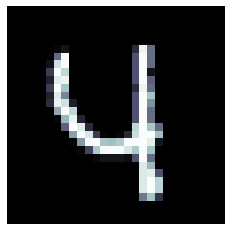

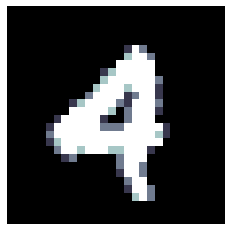

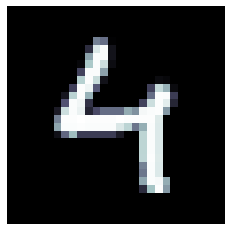

3 Examples of a True label 4 being correctly classified as a 4


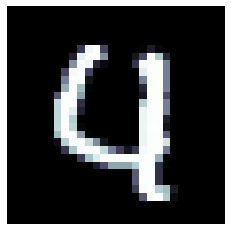

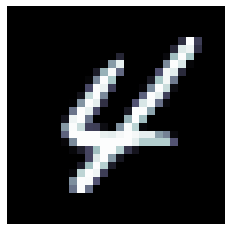

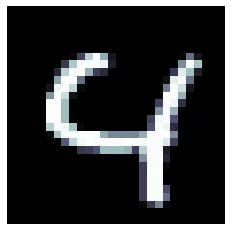

In [36]:
# 3 Examples of a True label 4 being misclassified as a 9 (Confusion example)
print('3 Examples of a True label 4 being incorrectly classified as a 9')
def P5(num_examples=3):
    for i in range(num_examples):
        plt.plot(figsize=(10,10))
        plt.imshow(dev_data[(dev_labels=='4') & (y_pred_knn=='9')][i].reshape((28,28)),cmap=plt.cm.bone)
        plt.axis('off') 
        plt.show()
P5(3)


print('3 Examples of a True label 4 being correctly classified as a 4')
# 3 Examples of a True label 4 being correctly classified as a 4 (Non-confused example)
def P5a(num_examples=3):
    for i in range(num_examples):
        plt.plot(figsize=(10,10))
        plt.imshow(dev_data[(dev_labels=='4') & (y_pred_knn=='4')][i].reshape((28,28)),cmap=plt.cm.bone)
        plt.axis('off') 
        plt.show()
P5a(3)
### STUDENT END ###

3 Examples of a True label 9 being incorrectly classified as a 7


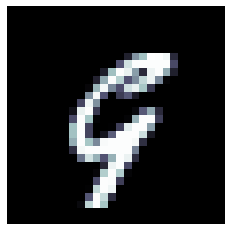

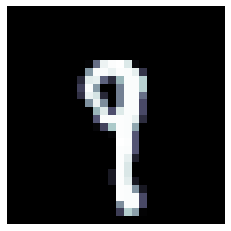

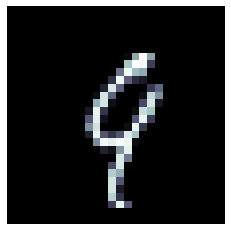

3 Examples of a True label 9 being correctly classified as a 9


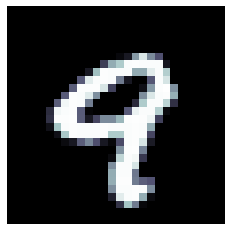

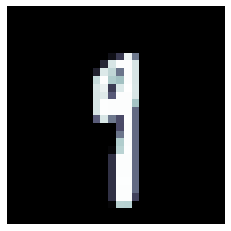

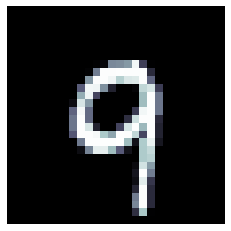

In [37]:
# 3 Examples of a True label 9 being misclassified as a 7 (Confusion example)
print('3 Examples of a True label 9 being incorrectly classified as a 7')
def P5(num_examples=3):
    for i in range(num_examples):
        plt.plot(figsize=(10,10))
        plt.imshow(dev_data[(dev_labels=='9') & (y_pred_knn=='7')][i].reshape((28,28)),cmap=plt.cm.bone)
        plt.axis('off') 
        plt.show()
P5(3)

print('3 Examples of a True label 9 being correctly classified as a 9')
# 3 Examples of a True label 9 being classified as a 9 (Non-confused example)
def P5a(num_examples=3):
    for i in range(num_examples):
        plt.plot(figsize=(10,10))
        plt.imshow(dev_data[(dev_labels=='9') & (y_pred_knn=='9')][i].reshape((28,28)),cmap=plt.cm.bone)
        plt.axis('off') 
        plt.show()
P5a(3)
### STUDENT END ###

3 Examples of a True label 2 being incorrectly classified as a 8


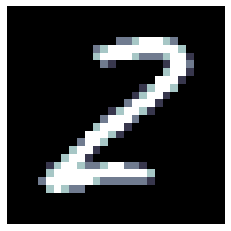

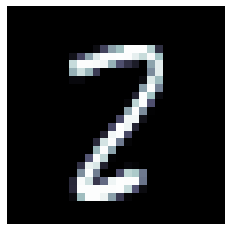

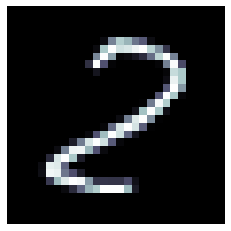

3 Examples of a True label 2 being correctly classified as a 2


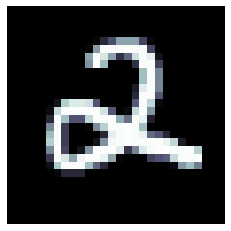

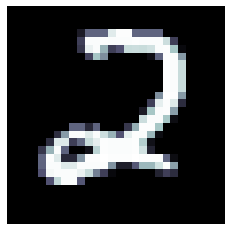

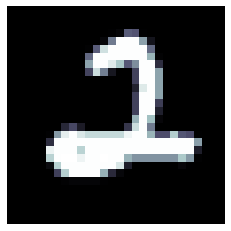

In [15]:
# 3 Examples of a True label 2 being misclassified as a 8 (Confusion example)
print('3 Examples of a True label 2 being incorrectly classified as a 8')
def P5(num_examples=3):
    for i in range(num_examples):
        plt.plot(figsize=(10,10))
        plt.imshow(dev_data[(dev_labels=='2') & (y_pred_knn=='8')][i].reshape((28,28)),cmap=plt.cm.bone)
        plt.axis('off') 
        plt.show()
P5(3)

print('3 Examples of a True label 2 being correctly classified as a 2')
# 3 Examples of a True label 2 being classified as a 2 (Non-confused example)
def P5a(num_examples=3):
    for i in range(num_examples):
        plt.plot(figsize=(10,10))
        plt.imshow(dev_data[(dev_labels=='2') & (y_pred_knn=='2')][i].reshape((28,28)),cmap=plt.cm.bone)
        plt.axis('off') 
        plt.show()
P5a(3)
### STUDENT END ###

ANSWER: 4 is most often confused for 9 by the digit classification model. Following in second place are '9's which are often confused for '7's. Finally in third place, are '2's which are confused for '8's.

#### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [38]:
##Define a mean blur function

def meanfilter(data):
    #make a copy of the data for blurred data
    blurred_data = data.copy()
    #make a copy of the data for non-blurred data
    original_data = data.copy()
    #run an iterative mean blur over each sample in 3x3 kernel in the grid
    for i in range(len(data)):
        old_array=original_data[i].reshape(28,28)
        new_array=blurred_data[i].reshape(28,28)
        for j in range(1,27):
            for z in range(1,27):            
                new_array[j,z] = ( old_array[j-1,z-1] + old_array[j-1,z] + old_array[j-1,z+1] + old_array[j,z+1] + old_array[j+1,z+1] + old_array[j+1,z] + old_array[j+1,z-1] + old_array[j,z-1] + old_array[j,z] )/ 9    
        new_array = new_array.reshape(784,)
        blurred_data[i] = new_array 
    return blurred_data

In [7]:
#Scenario 1 : Filter the mini training data but not the dev data and find accuracy

#Apply mean filter to mini training data
blurred_mini_train_data= meanfilter(mini_train_data)

#Create K Nearest Neighbours model
knn1 = KNeighborsClassifier(n_neighbors=1, p=2, metric ='minkowski')
knn1.fit(blurred_mini_train_data, mini_train_labels)
y_pred_knn1 = knn1.predict(dev_data)

#Use classification report to get results
print("\n \n Performance metrics : Scenario 1")
knn_score1 = knn1.score(dev_data, dev_labels)
print('KNN :', knn_score1)
error1 = (dev_labels != y_pred_knn1).sum()/len(y_pred_knn1)
print('Prediction error: %.3f' % error1)
print('Prediction accuracy: %.3f'% (1-error1))
print(classification_report(dev_labels, y_pred_knn1))



 
 Performance metrics : Scenario 1
KNN : 0.907
Prediction error: 0.093
Prediction accuracy: 0.907
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       106
           1       0.93      0.97      0.95       118
           2       0.93      0.86      0.89       106
           3       0.94      0.88      0.91        97
           4       0.93      0.85      0.89        92
           5       0.94      0.89      0.91        88
           6       0.92      0.95      0.93       102
           7       0.92      0.94      0.93       102
           8       0.82      0.84      0.83        94
           9       0.80      0.92      0.85        95

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.91      1000
weighted avg       0.91      0.91      0.91      1000



In [8]:
#Scenario 2 : Filter the dev data but not the mini training data and find accuracy

#Apply mean filter to dev data
blurred_dev_data= meanfilter(dev_data)

#Create K Nearest Neighbours model
knn2 = KNeighborsClassifier(n_neighbors=1, p=2, metric ='minkowski')
knn2.fit(mini_train_data, mini_train_labels)
y_pred_knn2 = knn2.predict(blurred_dev_data)

#Use classification report to get results
print("\n \n Performance metrics : Scenario 2")
knn_score2 = knn2.score(blurred_dev_data, dev_labels)
print('KNN :', knn_score2)
error2 = (dev_labels != y_pred_knn2).sum()/len(y_pred_knn2)
print('Prediction error: %.3f' % error2)
print('Prediction accuracy: %.3f'% (1-error2))
print(classification_report(dev_labels, y_pred_knn2))


 
 Performance metrics : Scenario 2
KNN : 0.868
Prediction error: 0.132
Prediction accuracy: 0.868
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       106
           1       0.81      0.98      0.89       118
           2       0.92      0.75      0.83       106
           3       0.92      0.87      0.89        97
           4       0.89      0.82      0.85        92
           5       0.84      0.88      0.86        88
           6       0.88      0.90      0.89       102
           7       0.84      0.94      0.89       102
           8       0.88      0.72      0.80        94
           9       0.78      0.86      0.82        95

    accuracy                           0.87      1000
   macro avg       0.87      0.86      0.87      1000
weighted avg       0.87      0.87      0.87      1000



In [9]:
#Scenario 3 : Filter both dev data and the mini training data and find accuracy

#Apply mean filter to both dev data and mini training data
blurred_mini_train_data= meanfilter(mini_train_data)
blurred_dev_data= meanfilter(dev_data)

#Create K Nearest Neighbours model
knn3 = KNeighborsClassifier(n_neighbors=1, p=2, metric ='minkowski')
knn3.fit(blurred_mini_train_data, mini_train_labels)
y_pred_knn3 = knn3.predict(blurred_dev_data)

#Use classification report to get results
print("\n \n Performance metrics : Scenario 3")
knn_score3 = knn3.score(blurred_dev_data, dev_labels)
print('KNN :', knn_score3)
error3 = (dev_labels != y_pred_knn3).sum()/len(y_pred_knn3)
print('Prediction error: %.3f' % error3)
print('Prediction accuracy: %.3f'% (1-error3))
print(classification_report(dev_labels, y_pred_knn3))


 
 Performance metrics : Scenario 3
KNN : 0.905
Prediction error: 0.095
Prediction accuracy: 0.905
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       106
           1       0.93      0.97      0.95       118
           2       0.95      0.84      0.89       106
           3       0.92      0.89      0.91        97
           4       0.95      0.86      0.90        92
           5       0.91      0.88      0.89        88
           6       0.91      0.93      0.92       102
           7       0.88      0.94      0.91       102
           8       0.84      0.84      0.84        94
           9       0.82      0.94      0.87        95

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.91      0.91      0.90      1000



#### Summary of Part 6 Answer: 

After using the filter,

- Scenario 1 - Filter the mini training data but not the dev data : Accuracy is 0.907

- Scenario 2 - Filter the dev data but not the mini training data : Accuracy is 0.868 i.e. lower than that in Scenario 1

- Scenario 3 - Filter both dev data and the mini training data : Accuracy is 0.905 i.e. slightly lower than that in Scenario 1

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [20]:
#Part 7 Answer


#Bernoulli Model Score, use 0.5 as a reasonable threshold for binarization of X values
bnb = BernoulliNB(binarize=0.5)
bnb.fit(mini_train_data, mini_train_labels)
bnb.score(dev_data, dev_labels)

0.819

In [21]:
#Define function to turn x data into multinomial 3 categories 0, 1, 2 based on 0.333, 0.666, and above till 1 respectively.

def category(data):
    categorized_data = data.copy()
    for i in range(len(categorized_data)):
        categorized_data[i] = np.where(categorized_data[i] < (1/3), 0, np.where(categorized_data[i]< (2/3) , 1, 2) )
    return categorized_data

mnb_mini_train_data = category(mini_train_data)
mnb_dev_data = category(dev_data)


In [22]:
#Multinomial with category
from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()
mnb1.fit(mnb_mini_train_data, mini_train_labels)
mnb1.score(mnb_dev_data, dev_labels)


0.815

### ANSWER: 
The accuracy of a MultiNomial Naive Bayes model at 81.5%  is slightly less than that of a Multivariate Bernoulli model with 81.9% accuracy. The performance of a Bernoulli model is better on easier tasks with small training size like that for a simplistic black and white digit classification. Whereas for the multinomial models, the slightly larger event space for each feature reduces the accuracy of the model because it competes for the same probability mass. 

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [23]:
#Part 8 Answer

from sklearn.model_selection import GridSearchCV

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}


#Define a function which takes alphas and produces grid search best alpha estimate for those alphas
def P8(alphas):
    for i in alphas.values():
        for j in i:
            bnb = BernoulliNB(binarize=0.5, alpha=j)
            bnb.fit(mini_train_data, mini_train_labels)
            print('This is the model accuracy score for alpha =', str(j), 'evaluated against dev data:')
            print(bnb.score(dev_data, dev_labels))
            print('\n')
    grid = GridSearchCV(estimator = BernoulliNB(binarize=0.5), param_grid = alphas)
    grid.fit(mini_train_data, mini_train_labels)
    print("According to GridSearchCV Best alpha = ",grid.best_estimator_.alpha)
    print("According to GridSearchCV Best score = " ,grid.best_score_)

P8(alphas)




This is the model accuracy score for alpha = 1e-10 evaluated against dev data:
0.815


This is the model accuracy score for alpha = 0.0001 evaluated against dev data:
0.822


This is the model accuracy score for alpha = 0.001 evaluated against dev data:
0.828


This is the model accuracy score for alpha = 0.01 evaluated against dev data:
0.829


This is the model accuracy score for alpha = 0.1 evaluated against dev data:
0.828


This is the model accuracy score for alpha = 0.5 evaluated against dev data:
0.822


This is the model accuracy score for alpha = 1.0 evaluated against dev data:
0.819


This is the model accuracy score for alpha = 2.0 evaluated against dev data:
0.814


This is the model accuracy score for alpha = 10.0 evaluated against dev data:
0.763


According to GridSearchCV Best alpha =  0.001
According to GridSearchCV Best score =  0.8390000000000001


ANSWER: 
The best value for alpha according to GridSearchCV is 0.001.
Accuracy on evaluating model performance against dev data when alpha is near 0 is 81.5%. 
Yes it is expected that having an alpha value close to zero would produce a model with less accuracy than that with alpha at 0.001. 
The reason is that in dev data set may contain samples that do not appear in the training data set. 
Having alpha close to zero would mean the probability of the out-of-training observation in the dev data set will equal zero. The model would not be able to classify the dev samples as accurately.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [39]:
#Part 9 Answer
### STUDENT Start ###

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

#Test a range of var smoothing values
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

#Gaussian Naive Bayes Gridsearch 
grid_gnb = GridSearchCV(estimator = GaussianNB(), param_grid = parameters, scoring ='accuracy')
grid_gnb.fit(mini_train_data, mini_train_labels)              


#Find best var smoothing factor
print(grid_gnb.best_estimator_.var_smoothing)

best_var = grid_gnb.best_estimator_.var_smoothing

0.03511191734215131


In [40]:
#Before tuning the GaussianNB model. Accuracy score is 0.593.
gnb= GaussianNB()
gnb.fit(mini_train_data, mini_train_labels) 
gnb.score(dev_data, dev_labels)

0.593

In [41]:
#After tuning the GaussianNB model. Accuracy score is 0.814 which is close to what we have under BernoulliNB model

gnb= GaussianNB(var_smoothing=best_var)
gnb.fit(mini_train_data, mini_train_labels) 
gnb.score(dev_data, dev_labels)

### STUDENT END ###

0.814

### ANSWER: 
The solution is to improve the Gaussian Naive Bayes model accuracy by tuning the variance smoothing factor of the model since the Gaussian model gives more weight to the samples closer to the distribution mean. 

Tuning the variance smoothing factor artificially adds the best estimated value to the distribution's variance derived from the training data set. This widens and smooths the distribution curve and accounts for more samples that are further away from the distribution mean thereby improving accuracy.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.


How do the generated digit images compare to the training digit images?

In [42]:
#Part 10 Answer

#Initialize Bernoulli NB model
BNBZ = BernoulliNB(binarize=0.5, alpha=0.001)
BNBZ.fit(mini_train_data, mini_train_labels)

#Find posterior probabilities of Bernoulli NB model
probabilities = BNBZ.feature_log_prob_
probabilities = np.exp(probabilities)

#Create an image digit array for digits 1-10, 10 examples each
zcol = np.zeros(200)
for f in range(200):
    dig = f//20
    zcol[f] = dig

#Create the image grids for digits 1-10, 10 examples each, using a random number function against the Bernoulli probabilities    
zarray = np.zeros((200, 784))
for h in range(200):    
    #20 examples per digit
    dig = h//20
    #j will go through 784 pixels
    for j in range(784):
        prob = probabilities[dig][j]
        #If random number is less than probability then pixel value is 1 , else it is zero
        if np.random.rand() < prob:
            zarray[h][j] = 1
        else:
            zarray[h][j] = 0

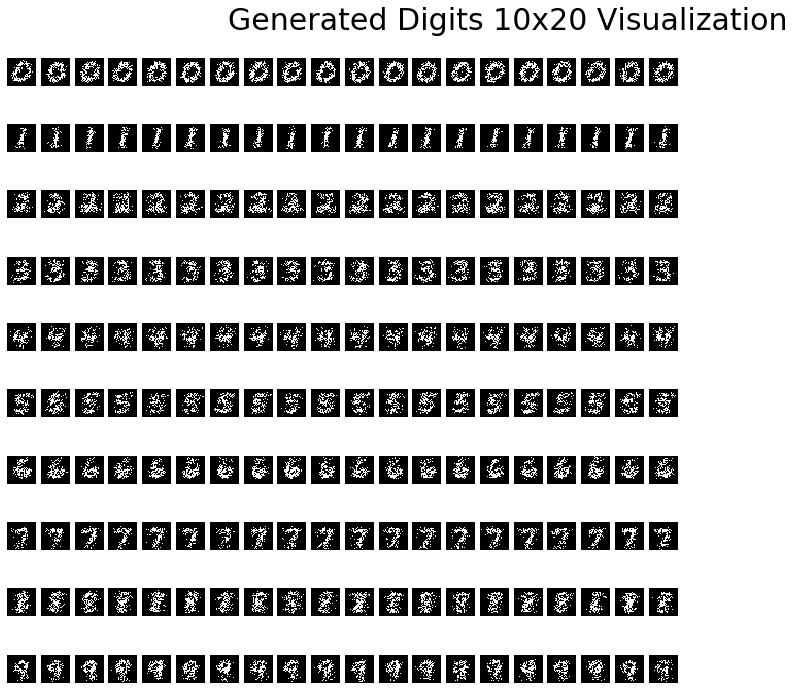

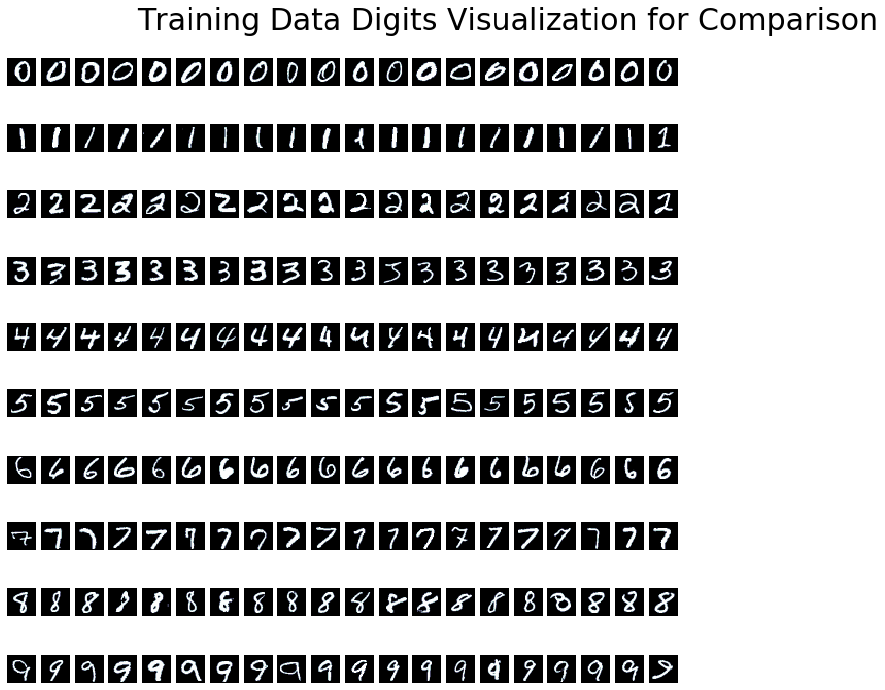

In [43]:
#Define part 10 function to plot the 10 x 20 images that we just generated using the Bernoulli model's Posterior Probabilities above
def P10(num_examples=20):
    #Find unique digits in Y values
    digits = np.unique(zcol)
    #Find dimensions for array
    dim = int(np.sqrt(zarray.shape[1]))
    #Plot 10 by 20 subplots
    fig, axs = plt.subplots(len(digits), num_examples,figsize=(12,12))
    for i,d in enumerate(digits):
        plt.title("Generated Digits 10x20 Visualization", y=23, x=-5,fontsize=30)
        for j in range(num_examples):
            axs[i,j].imshow(zarray[zcol==d][j].reshape((dim,dim)),cmap=plt.cm.bone)
            axs[i,j].axis('off')
P10(20)   

#For comparison purposes, plot 10x20 images from the training data set, we can see that the training images are a lot clearer
def P1(num_examples=20):
    #Find unique digits in Y values
    digits = np.unique(Y)
    #Find dimensions for array
    dim = int(np.sqrt(X.shape[1]))
    #Plot 10 by 10 subplots
    fig, axs = plt.subplots(len(digits), num_examples,figsize=(12,12))
    for i,d in enumerate(digits):
        plt.title("Training Data Digits Visualization for Comparison", y=23, x=-5,fontsize=30)
        for j in range(num_examples):
            axs[i,j].imshow(X[Y==d][j].reshape((dim,dim)),cmap=plt.cm.bone)
            axs[i,j].axis('off')
P1(20)


### ANSWER: 
The generated digit images are much fuzzier and more blur compared to the training images.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [29]:
#Part 11 Answer


#Initialize Buckets
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

#Create Bernoulli Model with best alpha per earlier answer via GridSearchCV of 0.001
BNBZ = BernoulliNB(binarize=0.5, alpha=0.001)
BNBZ.fit(mini_train_data, mini_train_labels)

#Find the array of predicted values by the model and probabilities
y_pred_BNBZ = BNBZ.predict(dev_data)
bnbz_arr_pred = BNBZ.predict_proba(dev_data)


#Run a loop to check for all samples in the dev data and log under appropriate buckets and record if prediction was right
for i in range(len(dev_data)):
    max_element = np.amax(bnbz_arr_pred[i])
    #idx = np.where(bnbz_arr_pred[i] == max_element)
    #idx = idx[0][0]
    for b in range(len(buckets)) :
        if max_element <= buckets[b]:
            total[b] += 1
            if y_pred_BNBZ[i] == dev_labels[i]:
                correct[b] += 1
            break

#Print Results
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): 
        accuracy = correct[i] / total[i]
        print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))




p(pred) is 0.5000000000000 to 0.9000000000000    total =  36    accuracy = 0.389
p(pred) is 0.9000000000000 to 0.9990000000000    total =  90    accuracy = 0.444
p(pred) is 0.9990000000000 to 0.9999900000000    total =  69    accuracy = 0.565
p(pred) is 0.9999900000000 to 0.9999999000000    total =  67    accuracy = 0.672
p(pred) is 0.9999999000000 to 0.9999999990000    total =  50    accuracy = 0.820
p(pred) is 0.9999999990000 to 0.9999999999900    total =  72    accuracy = 0.903
p(pred) is 0.9999999999900 to 0.9999999999999    total =  66    accuracy = 0.894
p(pred) is 0.9999999999999 to 1.0000000000000    total = 550    accuracy = 0.955


### ANSWER: 

The model is weakly calibrated because when posterior probability is 90% , the weighted accuracy of the model is 81%. 
By looking at the buckets we can see postive correlation between posterior probability and accuracy of the model's predictions.